In [9]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

# 导入数据

In [10]:
data_frame = pd.read_excel('result.xlsx',engine='openpyxl')

# 建图

In [11]:
G=nx.Graph()

In [12]:
def my_add_edge(G,e1,e2):
    try:
        G[e1][e2]['weight'] += 1
    except:
        G.add_edge(e1,e2,weight=1)

In [13]:
for lst in data_frame.iloc[:,2]:
    x = lst
    lst = lst.strip('[').strip(']').split(', ')
    if len(lst)>=1:
        for i in range(len(lst)-1):
            for j in range(i,len(lst)):
                my_add_edge(G,lst[i],lst[j])

# 绘图

## 节点标签

In [14]:
f = open('country_dict.txt','rb')
country_dict = pickle.load(f)

In [15]:
node_label = {e:country_dict[int(e)][0] for e in G.nodes}

## 绘图

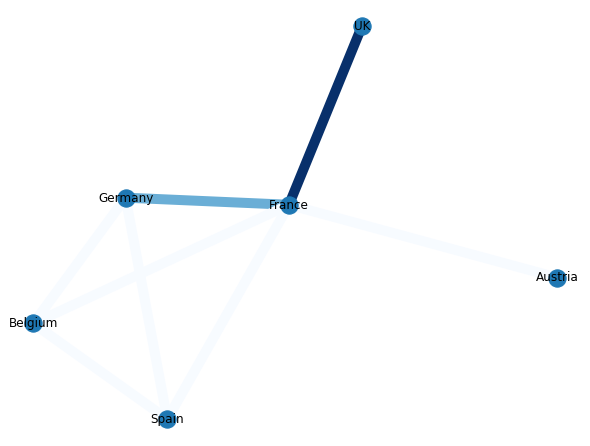

In [16]:
plt.rcParams['figure.figsize'] = (8, 6)
edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())
pos = nx.spring_layout(G)
nx.draw(G, pos,  edgelist=edges, edge_color=weights, width=10.0, edge_cmap=plt.cm.Blues,with_labels = False)
nx.draw_networkx_labels(G,pos,node_label)
#labels = {e: G.edges[e]["weight"] for e in G.edges}
#nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.savefig('graph.png')